In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/Deeplearning/Project

/content/drive/My Drive/Deeplearning/Project


In [0]:
import errno
import os
from datetime import datetime

mydir = os.path.join('saved_model', 
        datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
try:
        os.makedirs(mydir)
except OSError as e:
        if e.errno != errno.EEXIST:
            raise  # This was not a "directory exist" error..

In [0]:
import cv2
import math
import joblib
import numpy as np
import pandas as pd


import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from keras.utils import np_utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,AveragePooling2D, MaxPooling2D, ZeroPadding2D , Activation, BatchNormalization,concatenate ,Flatten,Dropout,Dense
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.optimizers import Adam,Adadelta, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import applications

In [0]:
import sys, os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

Loading Dataset and Preprocessing : 

In [0]:
from __future__ import print_function
import keras
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.regularizers import l2  #, activity_l2
import numpy
import csv
import scipy.misc
import scipy.stats
from scipy import ndimage
import imutils
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

def flatten_matrix(matrix):
    vector = matrix.flatten('F')
    vector = vector.reshape(1, len(vector))
    return vector

def zca_whitening(inputs):
    sigma = np.dot(inputs, inputs.T)/inputs.shape[1] #Correlation matrix
    U,S,V = np.linalg.svd(sigma) #Singular Value Decomposition
    epsilon = 0.1                #Whitening constant, it prevents division by zero
    ZCAMatrix = np.dot(np.dot(U, np.diag(1.0/np.sqrt(np.diag(S) + epsilon))), U.T)                     #ZCA Whitening matrix
    return np.dot(ZCAMatrix, inputs)   #Data whitening
    
def global_contrast_normalize(X, scale=1., subtract_mean=True, use_std=True,
                              sqrt_bias=10, min_divisor=1e-8):

    """
    __author__ = "David Warde-Farley"
    __copyright__ = "Copyright 2012, Universite de Montreal"
    __credits__ = ["David Warde-Farley"]
    __license__ = "3-clause BSD"
    __email__ = "wardefar@iro"
    __maintainer__ = "David Warde-Farley"
    .. [1] A. Coates, H. Lee and A. Ng. "An Analysis of Single-Layer
       Networks in Unsupervised Feature Learning". AISTATS 14, 2011.
       http://www.stanford.edu/~acoates/papers/coatesleeng_aistats_2011.pdf
    """
    assert X.ndim == 2, "X.ndim must be 2"
    scale = float(scale)
    assert scale >= min_divisor

    mean = X.mean(axis=1)
    if subtract_mean:
        X = X - mean[:, numpy.newaxis]  
    else:
        X = X.copy()
    if use_std:
        ddof = 1
        if X.shape[1] == 1:
            ddof = 0
        normalizers = numpy.sqrt(sqrt_bias + X.var(axis=1, ddof=ddof)) / scale
    else:
        normalizers = numpy.sqrt(sqrt_bias + (X ** 2).sum(axis=1)) / scale
    normalizers[normalizers < min_divisor] = 1.
    X /= normalizers[:, numpy.newaxis]  # Does not make a copy.
    return X
def ZeroCenter(data):
    data = data - numpy.mean(data,axis=0)
    return data

def normalize(arr):
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

def Flip(data):
    dataFlipped = data[..., ::-1].reshape(2304).tolist()
    return dataFlipped

def Roated15Left(data):
    num_rows, num_cols = data.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
    img_rotation = cv2.warpAffine(data, rotation_matrix, (num_cols, num_rows))
    return img_rotation.reshape(2304).tolist()

def Roated15Right(data):
    num_rows, num_cols = data.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), -30, 1)
    img_rotation = cv2.warpAffine(data, rotation_matrix, (num_cols, num_rows))
    return img_rotation.reshape(2304).tolist()

def Zoomed(data):
    datazoomed = scipy.misc.imresize(data,(60,60))
    datazoomed = datazoomed[5:53,5:53]
    datazoomed = datazoomed.reshape(2304).tolist()
    return datazoomed

def shiftedUp20(data):
    translated = imutils.translate(data, 0, -5)
    translated2 = translated.reshape(2304).tolist()
    return translated2
def shiftedDown20(data):
    translated = imutils.translate(data, 0, 5)
    translated2 = translated.reshape(2304).tolist()
    return translated2

def shiftedLeft20(data):
    translated = imutils.translate(data, -5, 0)
    translated2 = translated.reshape(2304).tolist()
    return translated2
def shiftedRight20(data):
    translated = imutils.translate(data, 5, 0)
    translated2 = translated.reshape(2304).tolist()
    return translated2

def outputImage(pixels,number):
    data = pixels
    name = str(number)+"output.jpg" 
    scipy.misc.imsave(name, data)

def Zerocenter_ZCA_whitening_Global_Contrast_Normalize(list):
    Intonumpyarray = numpy.asarray(list)
    data = Intonumpyarray.reshape(48,48)
    data2 = ZeroCenter(data)
    #data3 = zca_whitening(flatten_matrix(data2)).reshape(48,48)
    #data4 = global_contrast_normalize(data3)
    #data5 = numpy.rot90(data4,3)
    return data2

def load_test_data():
    f = open('FER2013/fer2013.csv')
    csv_f = csv.reader(f)
    test_set_x =[]
    test_set_y =[]
    for row in csv_f:  
        if str(row[2]) == "PrivateTest" :
            test_set_y.append(int(row[0]))
            temp_list = []
            for pixel in row[1].split( ):
                temp_list.append(int(pixel))
            data = Zerocenter_ZCA_whitening_Global_Contrast_Normalize(temp_list)
            test_set_x.append(data)
    return test_set_x, test_set_y

def load_data():

    train_x = []
    train_y = []
    val_x =[]
    val_y =[]

   
    number = 0

    f = open('FER2013/fer2013.csv')
    csv_f = csv.reader(f)

    for row in csv_f:   
            if str(row[2]) == "Training"  :
                temp_list = []

                for pixel in row[1].split( ):
                    temp_list.append(int(pixel))

                data = Zerocenter_ZCA_whitening_Global_Contrast_Normalize(temp_list)
                train_y.append(int(row[0]))
                train_x.append(data.reshape(2304).tolist())

            elif str(row[2]) == "PublicTest":
                temp_list = []

                for pixel in row[1].split( ):
                    temp_list.append(int(pixel))

                data = Zerocenter_ZCA_whitening_Global_Contrast_Normalize(temp_list)
                val_y.append(int(row[0]))
                val_x.append(data.reshape(2304).tolist())

    return train_x, train_y, val_x, val_y

def load_data_2():

    train_x = []
    train_y = []

   
    number = 0
    f = open('FER2013/fer2013.csv')
    csv_f = csv.reader(f)

    for row in csv_f:   
            if str(row[2]) == "Training"  :
                temp_list = []

                for pixel in row[1].split( ):
                    temp_list.append(int(pixel))

                data = Zerocenter_ZCA_whitening_Global_Contrast_Normalize(temp_list)
                train_y.append(int(row[0]))
                train_x.append(data.reshape(2304).tolist())

            elif str(row[2]) == "PublicTest":
                temp_list = []

                for pixel in row[1].split( ):
                    temp_list.append(int(pixel))

                data = Zerocenter_ZCA_whitening_Global_Contrast_Normalize(temp_list)
                train_y.append(int(row[0]))
                train_x.append(data.reshape(2304).tolist())

    return train_x, train_y

def plot(training_results, validation_results, results_type, model_name="dexpression"):
    fig = plt.figure(figsize=[8, 6])

    plt.plot(training_results, 'r', linewidth=3.0)
    plt.plot(validation_results, 'b', linewidth=3.0)
    plt.legend(['Training ' + results_type, 'Validation ' + results_type], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel(results_type, fontsize=16)
    plt.title(results_type + ' of ' + model_name, fontsize=16)

In [0]:
img_x, labels = load_data_2()

KeyboardInterrupt: ignored

In [0]:
test_set_x, test_set_y = load_test_data()

In [0]:
img_rows, img_cols = 48, 48
nb_classes = 7
img_channels = 1
img_x = numpy.asarray(img_x) 
img_x = img_x.reshape(img_x.shape[0],img_rows,img_cols)
img_x = img_x.reshape(img_x.shape[0], img_rows, img_cols,1)
img_x = img_x.astype('float32')


labels = np_utils.to_categorical(labels, nb_classes)

test_set_x = numpy.asarray(test_set_x) 
test_set_x = test_set_x.reshape(test_set_x.shape[0],img_rows,img_cols)
test_set_x = test_set_x.reshape(test_set_x.shape[0], img_rows, img_cols,1)
test_set_x = test_set_x.astype('float32')

test_set_y = np_utils.to_categorical(test_set_y, nb_classes)

In [0]:
train_x, train_y, val_x, val_y = load_data()
test_set_x, test_set_y = load_test_data()

In [0]:
img_rows, img_cols = 48, 48
nb_classes = 7
img_channels = 1
train_x = numpy.asarray(train_x) 
train_x = train_x.reshape(train_x.shape[0],img_rows,img_cols)

val_x = numpy.asarray(val_x)
val_x = val_x.reshape(val_x.shape[0],img_rows,img_cols)

train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols,1)
val_x = val_x.reshape(val_x.shape[0], img_rows, img_cols,1)

train_x = train_x.astype('float32')
val_x = val_x.astype('float32')


train_y = np_utils.to_categorical(train_y, nb_classes)
val_y = np_utils.to_categorical(val_y, nb_classes)

test_set_x = numpy.asarray(test_set_x) 
test_set_x = test_set_x.reshape(test_set_x.shape[0],img_rows,img_cols)
test_set_x = test_set_x.reshape(test_set_x.shape[0], img_rows, img_cols,1)
test_set_x = test_set_x.astype('float32')

test_set_y = np_utils.to_categorical(test_set_y, nb_classes)

In [0]:
newX_tr=[]
newY_tr=[]
img_labels = train_y
img_array = train_x
import imgaug.augmenters as iaa
import random
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
for i in range(len(img_array)):
  if (emotion_label_to_text[np.argmax(img_labels[i])]=='surprise'):
    p= random.uniform(0, 1)
    if(p>0.5):
      gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
      noise_image=gaussian_noise.augment_image(img_array[i])
      newX_tr.append(noise_image)
      newY_tr.append(img_labels[i])
  if (emotion_label_to_text[np.argmax(img_labels[i])]=='fear'):
    p= random.uniform(0, 1)
    if(p<0.2):
      gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
      noise_image=gaussian_noise.augment_image(img_array[i])
      newX_tr.append(noise_image)
      newY_tr.append(img_labels[i])
  if (emotion_label_to_text[np.argmax(img_labels[i])]=='anger'):
    p= random.uniform(0, 1)
    if(p<0.2):
      gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
      noise_image=gaussian_noise.augment_image(img_array[i])
      newX_tr.append(noise_image)
      newY_tr.append(img_labels[i])
  if (emotion_label_to_text[np.argmax(img_labels[i])]=='disgust'):
    flip_hr=iaa.Fliplr(p=1.0)
    flip_hr_image= flip_hr.augment_image(img_array[i])
    newX_tr.append(flip_hr_image)
    newY_tr.append(img_labels[i])

    con=iaa.LinearContrast((0.5, 2.0), per_channel=0.5)
    con_image = con.augment_image(img_array[i])
    newX_tr.append(con_image)
    newY_tr.append(img_labels[i])

    sh = iaa.Sharpen(alpha=.2, lightness=(0.75, 1.5))
    sh_image = sh.augment_image(img_array[i])
    newX_tr.append(sh_image)
    newY_tr.append(img_labels[i])

    croped = iaa.Crop(percent=(0, 0.02))
    croped_image = croped.augment_image(img_array[i])
    newX_tr.append(croped_image)
    newY_tr.append(img_labels[i])

    gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
    noise_image=gaussian_noise.augment_image(img_array[i])
    newX_tr.append(noise_image)
    newY_tr.append(img_labels[i])
  newX_tr.append(img_array[i])
  newY_tr.append(img_labels[i])

newX_tr = np.array(newX_tr)
newY_tr = np.array(newY_tr)

Models Definining :

In [0]:
#######################################NOT USED################################################################
def model_orig_temp(input_shape=(48,48,1), num_classes=7):
  padding='VALID'
  dropout_rate=0.6
  LR=0.001
  batch_size=200
  num_epoch=200
  inp = Input(shape=input_shape)
  X = ZeroPadding2D(padding=(3, 3))(inp)
  X = Conv2D(filters = 64, kernel_size = (7, 7), strides = (1,1), padding = "same", activation = 'relu')(inp)
  X = MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding=padding)(X)
  X = BatchNormalization()(X)


  X_1 = Conv2D(filters = 96, kernel_size = (1,1), strides = (1,1), padding = "same", activation = 'relu')(X)
  X_1 = ZeroPadding2D(padding=(1, 1))(X_1)
  X_1 = Conv2D(filters = 208,kernel_regularizer=regularizers.l2(0.01), kernel_size = (3,3), strides = (1,1), padding = "valid", activation = 'relu')(X_1)
  X_1 = Dropout(0.5)(X_1)

  X_2 = MaxPooling2D(pool_size=(3, 3),strides=(1,1),padding="same")(X)
  X_2 = Conv2D(filters = 64, kernel_size = (1,1), strides = (1,1), padding = "same", activation = 'relu')(X_2)
  X_2 = Dropout(0.3)(X_2)

  merged = concatenate([X_1, X_2], axis=3)
  merged = MaxPooling2D(pool_size=(3, 3),strides=1,padding=padding)(merged)

  merged_1 = Conv2D(filters = 96, kernel_size = (1,1), strides = (1,1), padding = "same", activation = 'relu')(merged)
  merged_1 = ZeroPadding2D(padding=(1, 1))(merged_1)
  merged_1 = Conv2D(filters = 208,kernel_regularizer=regularizers.l2(0.01), kernel_size = (3,3), strides = (1,1), padding = "valid", activation = 'relu')(merged_1)
  merged_1 = Dropout(0.3)(merged_1)

  merged_2 = MaxPooling2D(pool_size=(3, 3),strides=1,padding="same")(merged)
  merged_2 = Conv2D(filters = 64, kernel_size = (1,1), strides = (1,1), kernel_regularizer=regularizers.l2(0.01), padding = "valid", activation = 'relu')(merged_2)
  out = concatenate([merged_1, merged_2], axis=3)
  out = MaxPooling2D(pool_size=(3, 3),strides=1,padding=padding)(out)

  merged_3 = Conv2D(filters = 96, kernel_size = (1,1), strides = (1,1), padding = "valid", activation = 'relu')(out)
  merged_3 = ZeroPadding2D(padding=(1, 1))(merged_3)
  merged_3 = Conv2D(filters = 208,kernel_regularizer=regularizers.l2(0.01), kernel_size = (3,3), strides = (1,1), padding = "valid", activation = 'relu')(merged_3)
  merged_3 = Dropout(0.4)(merged_3)

  merged_4 = MaxPooling2D(pool_size=(3, 3),strides=1,padding="same")(merged_3)
  merged_4 = Conv2D(filters = 64, kernel_size = (1,1), strides = (1,1), kernel_regularizer=regularizers.l2(0.01), padding = "valid", activation = 'relu')(merged_4)
  out_2 = concatenate([merged_3, merged_4], axis=3)
  out_2 = MaxPooling2D(pool_size=(3, 3),strides=1,padding=padding)(out_2)

  out_2 = Flatten()(out_2)
  out_2 = Dropout(0.3)(out_2)
  out_2 = Dense(num_classes, activation="softmax", kernel_regularizer=regularizers.l2(0.01))(out_2)
  model = Model(inputs = inp, outputs = out_2)

  ad = Adam(lr=LR)
  model.compile(optimizer=ad, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

Dexpression Model original :


In [0]:
def model_orig(input_shape=(48,48,1), num_classes=7):
    padding = 'same'
    inp = Input(shape=input_shape)
    # START MODEL
    conv_1 = Conv2D(64, (7, 7), strides=(2, 2), padding=padding, activation='relu', name='conv_1')(inp)
    maxpool_1 = MaxPooling2D((3, 3), strides=(2,2))(conv_1)
    maxpool_1 = Dropout(0.3)(maxpool_1)
    x = BatchNormalization()(maxpool_1)
    
    # FEAT-EX1
    conv_2a = Conv2D(96, (1, 1), strides=(1,1), activation='relu', padding=padding, name='conv_2a')(x)
    conv_2b = Conv2D(208, (3, 3), strides=(1,1), activation='relu', padding=padding, name='conv_2b')(conv_2a)
    maxpool_2a = MaxPooling2D((3,3), strides=(1,1), padding=padding, name='maxpool_2a')(x)
    maxpool_2a = Dropout(0.3)(maxpool_2a)
    conv_2c = Conv2D(64, (1, 1), strides=(1,1), name='conv_2c')(maxpool_2a)
    concat_1 = concatenate([conv_2b,conv_2c],axis=3,name='concat_2')
    maxpool_2b = MaxPooling2D((3,3), strides=(1,1), padding=padding, name='maxpool_2b')(concat_1)
    maxpool_2b = Dropout(0.3)(maxpool_2b)
    
    # FEAT-EX2
    conv_3a = Conv2D(96, (1, 1), strides=(1,1), activation='relu', padding=padding, name='conv_3a')(maxpool_2b)
    conv_3b = Conv2D(208, (3, 3), strides=(1,1), activation='relu', padding=padding, name='conv_3b')(conv_3a)
    maxpool_3a = MaxPooling2D((3,3), strides=(1,1), padding=padding, name='maxpool_3a')(maxpool_2b)
    maxpool_3a = Dropout(0.3)(maxpool_3a)
    conv_3c = Conv2D(64, (1, 1), strides=(1,1), name='conv_3c')(maxpool_2a)
    concat_3 = concatenate([conv_3b,conv_3c],axis=3,name='concat_3')
    maxpool_3b = MaxPooling2D((3,3), strides=(1,1), padding=padding, name='maxpool_3b')(concat_3)
    maxpool_3b = Dropout(0.3)(maxpool_3b)

    # FINAL LAYERS
    net = Flatten()(maxpool_3b)
    net = Dense(num_classes, activation='softmax', name='predictions')(net)
    model = Model(inputs = inp, outputs = net)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Dexpression Model with only one feature extraction blocks :

In [0]:
def model_origsimp(input_shape=(48,48,1), num_classes=7):
    padding = 'same'
    inp = Input(shape=input_shape)
    # START MODEL
    conv_1 = Conv2D(64, (7, 7), strides=(2, 2), padding=padding, activation='relu', name='conv_1')(inp)
    maxpool_1 = MaxPooling2D((3, 3), strides=(2,2))(conv_1)
    maxpool_1 = Dropout(0.3)(maxpool_1)
    x = BatchNormalization()(maxpool_1)
    
    # FEAT-EX1
    conv_2a = Conv2D(96, (1, 1), strides=(1,1), activation='relu', padding=padding, name='conv_2a')(x)
    conv_2b = Conv2D(208, (3, 3), strides=(1,1), activation='relu', padding=padding, name='conv_2b')(conv_2a)
    maxpool_2a = MaxPooling2D((3,3), strides=(1,1), padding=padding, name='maxpool_2a')(x)
    maxpool_2a = Dropout(0.3)(maxpool_2a)
    conv_2c = Conv2D(64, (1, 1), strides=(1,1), name='conv_2c')(maxpool_2a)
    concat_1 = concatenate([conv_2b,conv_2c],axis=3,name='concat_2')
    maxpool_2b = MaxPooling2D((3,3), strides=(1,1), padding=padding, name='maxpool_2b')(concat_1)
    maxpool_2b = Dropout(0.3)(maxpool_2b)
    

    # FINAL LAYERS
    net = Flatten()(maxpool_2b)
    net = Dense(num_classes, activation='softmax', name='predictions')(net)
    model = Model(inputs = inp, outputs = net)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

CNN model #1 :


In [0]:
def model_cnn(input_shape=(48,48,1), num_classes=7):   
    model = Sequential()

    # Add convolutional layer consisting of 32 filters and shape of 3x3 with ReLU activation
    # We want to preserve more information for following layers so we use padding
    # 'Same' padding tries to pad evenly left and right, 
    # but if the amount of columns to be added is odd, it will add the extra column to the right
    model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
    model.add(BatchNormalization())

    # Add convolutional layer consisting of 32 filters and shape of 5x5 with ReLU activation
    # We give strides=2 for space between each sample on the pixel grid
    model.add(Conv2D(32, kernel_size = (5,5), strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    # Dropping %40 of neurons
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = (5,5), strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    # To be able to merge into fully connected layer we have to flatten
    model.add(Flatten())
    model.add(Dropout(0.4))
    # Lets add softmax activated neurons as much as number of classes
    model.add(Dense(num_classes, activation = "softmax"))
    # Compile the model with loss and metrics
    model.compile(optimizer =  Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    return model

CNN models #2 :

In [0]:
def model_cnn2(input_shape=(48,48,1), num_classes=7) :
  num_features = 64
  model = Sequential()
  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=input_shape, data_format='channels_last', kernel_regularizer=l2(0.01)))
  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(2*2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*num_features, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))
  model.compile(optimizer =  Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

  return model

Resnet Model :

In [0]:
def model_resnet(pretrained=True,freeze_layers=False, input_shape=(48,48,1), num_classes=7):
  
    if(pretrained):
        base_model = applications.resnet50.ResNet50(weights= 'imagenet',
                            include_top=True)
    else:
        base_model = applications.resnet50.ResNet50(weights= None,
                            include_top=False, input_shape=input_shape)


   
    resnet_model = tf.keras.Sequential()
    resnet_model.add(Conv2D(3,(3,3),padding='same', input_shape=input_shape))
    resnet_model.add(base_model)
    resnet_model.add(BatchNormalization())
    resnet_model.add(Flatten())
    resnet_model.add(Dense(8192, activation='relu'))
    resnet_model.add(Dropout(0.4))
    resnet_model.add(Dense(num_classes, activation='softmax'))
    resnet_model.compile(optimizer =  Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

    return resnet_model

HOG technique

In [0]:
print("extracting HOG features, this may take some minutes...")

hog_feats = []
for img in train_x:
    img = img.astype("uint8")
    img_ = cv2.resize(img, (64,128))
    # img_ = cv2.equalizeHist(img_)

    hog = cv2.HOGDescriptor()
    hog_descr = hog.compute(img_)
    hog_feats.append(hog_descr)


train_x_hog = np.array(hog_feats)
print(train_x_hog.shape)

extracting HOG features, this may take some minutes...
(28709, 3780, 1)


In [0]:
print("extracting HOG features, this may take some minutes...")

hog_feats = []
for img in val_x:
    img = img.astype("uint8")
    img_ = cv2.resize(img, (64,128))
    # img_ = cv2.equalizeHist(img_)

    hog = cv2.HOGDescriptor()
    hog_descr = hog.compute(img_)
    hog_feats.append(hog_descr)


val_x_hog = np.array(hog_feats)
print(val_x_hog.shape)

extracting HOG features, this may take some minutes...
(3589, 3780, 1)


In [0]:
print("extracting HOG features, this may take some minutes...")

hog_feats_test = []
for img in test_set_x:
    img = img.astype("uint8")
    img_ = cv2.resize(img, (64,128))
    # img_ = cv2.equalizeHist(img_)

    hog = cv2.HOGDescriptor()
    hog_descr = hog.compute(img_)
    hog_feats_test.append(hog_descr)


test_x_hog = np.array(hog_feats_test)
print(test_x_hog.shape)

extracting HOG features, this may take some minutes...
(3589, 3780, 1)


In [0]:
Xtrain_img, Xvalid_img, Xtrain_hog, Xvalid_hog, y_train, y_valid = \
train_test_split(img_x, hog_feats, labels,
                shuffle=True, stratify=img_labels, test_size=0.1,
                random_state=42)

print(Xtrain_img.shape, Xtrain_hog.shape, y_train.shape)
print(Xvalid_img.shape, Xvalid_hog.shape, y_valid.shape)

(29068, 48, 48, 1) (29068, 3780, 1) (29068, 7)
(3230, 48, 48, 1) (3230, 3780, 1) (3230, 7)


In [0]:
def dcnn_pipeline(input_shape):
    model_in = Input(shape=input_shape, name="input_DCNN")
    
    conv2d_1 = Conv2D(
        filters=64,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_1'
    )(model_in)
    batchnorm_1 = BatchNormalization(name='batchnorm_1')(conv2d_1)
    conv2d_2 = Conv2D(
        filters=64,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_2'
    )(batchnorm_1)
    batchnorm_2 = BatchNormalization(name='batchnorm_2')(conv2d_2)
    
    maxpool2d_1 = MaxPooling2D(pool_size=(2,2), name='maxpool2d_1')(batchnorm_2)
    dropout_1 = Dropout(0.4, name='dropout_1')(maxpool2d_1)

    conv2d_3 = Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_3'
    )(dropout_1)
    batchnorm_3 = BatchNormalization(name='batchnorm_3')(conv2d_3)
    conv2d_4 = Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_4'
    )(batchnorm_3)
    batchnorm_4 = BatchNormalization(name='batchnorm_4')(conv2d_4)
    
    maxpool2d_2 = MaxPooling2D(pool_size=(2,2), name='maxpool2d_2')(batchnorm_4)
    dropout_2 = Dropout(0.4, name='dropout_2')(maxpool2d_2)

    conv2d_5 = Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_5'
    )(dropout_2)
    batchnorm_5 = BatchNormalization(name='batchnorm_5')(conv2d_5)
    conv2d_6 = Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_6'
    )(batchnorm_5)
    batchnorm_6 = BatchNormalization(name='batchnorm_6')(conv2d_6)
    
    maxpool2d_3 = MaxPooling2D(pool_size=(2,2), name='maxpool2d_3')(batchnorm_6)
    dropout_3 = Dropout(0.4, name='dropout_3')(maxpool2d_3)

    flatten = Flatten(name='flatten_dcnn')(dropout_3)
        
    dense_1 = Dense(
        128,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense1_dcnn'
    )(flatten)
    batchnorm_7 = BatchNormalization(name='batchnorm_7')(dense_1)
    
    model_out = Dropout(0.6, name='dropout_4')(batchnorm_7)
    
    return model_in, model_out

In [0]:
def facial_HOG_pipeline(input_shape):
    model_in = Input(shape=input_shape, name="input_Facial_HOG")
    flatten = Flatten(name="flatten_hog")(model_in)
    dense1 = Dense(256, activation="relu", name="dense1_hog")(flatten)
    model_out = Dropout(0.4, name='dropout1_hog')(dense1)
        
    return model_in, model_out

In [0]:
def merge_models(models_in: list, models_out: list, num_classes: int, show_summary=False):
    
    concated = Concatenate()(models_out)
    dropout_1 = Dropout(0.4, name='dropout1_model')(concated)

    dense1 = Dense(256, activation="relu", name="dense1")(dropout_1)
    dropout_2 = Dropout(0.4, name='dropout2_model')(dense1)
    out = Dense(num_classes, activation="softmax", name="out_layer")(dropout_2)

    model = Model(inputs=models_in, outputs=out, name="FER_Model")

    if show_summary:
        model.summary()
    
    return model

In [0]:
dcnn_in, dcnn_out = dcnn_pipeline(input_shape=(48,48,1))
hog_in, hog_out = facial_HOG_pipeline(input_shape=(3780,1))

In [0]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    min_delta=0.00025,
    factor=0.25,
    patience=3,
    min_lr=1e-6,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [0]:
def data_generator_hog(Xtrain_img, Xtain_hog, ytrain, batch_size):
    while True:
        idx = np.random.permutation(Xtrain_img.shape[0])

        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.15,
            height_shift_range=0.15,
            shear_range=0.15,
            zoom_range=0.15,
            horizontal_flip=True,
        )

        batches = datagen.flow(Xtrain_img[idx], ytrain[idx], batch_size=batch_size, shuffle=False)
        idx0 = 0
        for batch in batches:
            idx1 = idx0 + batch[0].shape[0]

            yield [batch[0], Xtain_hog[idx[ idx0:idx1 ]]], batch[1]

            idx0 = idx1
            if idx1 >= Xtrain_img.shape[0]:
                break

In [0]:
model_1 = merge_models(
    models_in=[dcnn_in, hog_in],
    models_out=[dcnn_out, hog_out],
    num_classes=7
)

In [0]:
batch_size = 128
epochs = 100#45
lr = 0.001
optim = optimizers.Adam(learning_rate=lr)

model_1.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
)

history = model_1.fit(
    data_generator_hog(train_x, train_x_hog, train_y, batch_size=batch_size,),
    validation_data=([val_x, val_x_hog], val_y),
    steps_per_epoch=len(train_x) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    #use_multiprocessing=True
)


Epoch 1/100
225/224 [==============================] - 22s 98ms/step - loss: 1.9604 - accuracy: 0.2345 - val_loss: 1.7634 - val_accuracy: 0.3176 - lr: 0.0010
Epoch 2/100
225/224 [==============================] - 21s 95ms/step - loss: 1.7233 - accuracy: 0.3125 - val_loss: 1.5904 - val_accuracy: 0.3848 - lr: 0.0010
Epoch 3/100
225/224 [==============================] - 22s 96ms/step - loss: 1.6421 - accuracy: 0.3531 - val_loss: 1.5125 - val_accuracy: 0.4079 - lr: 0.0010
Epoch 4/100
225/224 [==============================] - 22s 96ms/step - loss: 1.5910 - accuracy: 0.3760 - val_loss: 1.4942 - val_accuracy: 0.4060 - lr: 0.0010
Epoch 5/100
225/224 [==============================] - 22s 96ms/step - loss: 1.5525 - accuracy: 0.3961 - val_loss: 1.4171 - val_accuracy: 0.4533 - lr: 0.0010
Epoch 6/100
225/224 [==============================] - 22s 96ms/step - loss: 1.4915 - accuracy: 0.4198 - val_loss: 1.3698 - val_accuracy: 0.4717 - lr: 0.0010
Epoch 7/100
225/224 [==============================]

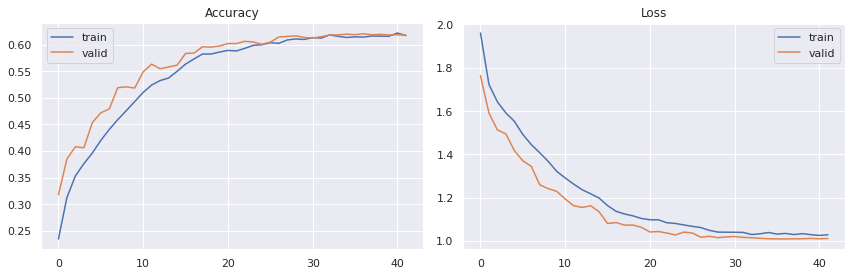

In [0]:
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_multipipe_model.png')
pyplot.show()

In [0]:
  model_1.save(os.path.join(mydir, 'model_hog.h5')) 

In [0]:
test_1 = model_1.evaluate([test_set_x, test_x_hog], test_set_y)
print(test_1[0], test_1[1])

113/113 [==============================] - 1s 10ms/step - loss: 0.9625 - accuracy: 0.6350
0.962494432926178 0.6349958181381226


In [0]:
val_1 = model_1.evaluate([val_x, val_x_hog], val_y)
print(val_1[0], val_1[1])

113/113 [==============================] - 1s 10ms/step - loss: 1.0087 - accuracy: 0.6202
1.0086696147918701 0.6202284693717957


In [0]:
def data_generator(Xtrain_img, ytrain, batch_size):
    while True:
        idx = np.random.permutation(Xtrain_img.shape[0])

        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.15,
            height_shift_range=0.15,
            shear_range=0.15,
            zoom_range=0.15,
            horizontal_flip=True,
        )

        batches = datagen.flow(Xtrain_img[idx], ytrain[idx], batch_size=batch_size, shuffle=False)
        idx0 = 0
        for batch in batches:
            idx1 = idx0 + batch[0].shape[0]

            yield batch[0], batch[1]

            idx0 = idx1
            if idx1 >= Xtrain_img.shape[0]:
                break

In [0]:
model_2 = model_cnn2()

history_2 = model_2.fit(
    data_generator(train_x, train_y, batch_size=batch_size,),
    validation_data=(val_x, val_y),
    steps_per_epoch=len(train_x) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    #use_multiprocessing=True
)

Epoch 1/100
225/224 [==============================] - 27s 119ms/step - loss: 2.0133 - accuracy: 0.2149 - val_loss: 1.8623 - val_accuracy: 0.2494 - lr: 0.0010
Epoch 2/100
225/224 [==============================] - 26s 115ms/step - loss: 1.8474 - accuracy: 0.2439 - val_loss: 1.9109 - val_accuracy: 0.2494 - lr: 0.0010
Epoch 3/100
225/224 [==============================] - 26s 114ms/step - loss: 1.8121 - accuracy: 0.2595 - val_loss: 1.7750 - val_accuracy: 0.2867 - lr: 0.0010
Epoch 4/100
225/224 [==============================] - 26s 114ms/step - loss: 1.7604 - accuracy: 0.2904 - val_loss: 1.6344 - val_accuracy: 0.3279 - lr: 0.0010
Epoch 5/100
225/224 [==============================] - 25s 113ms/step - loss: 1.7171 - accuracy: 0.3060 - val_loss: 1.5799 - val_accuracy: 0.3310 - lr: 0.0010
Epoch 6/100
225/224 [==============================] - 25s 113ms/step - loss: 1.6638 - accuracy: 0.3354 - val_loss: 1.6356 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 7/100
225/224 [=========================

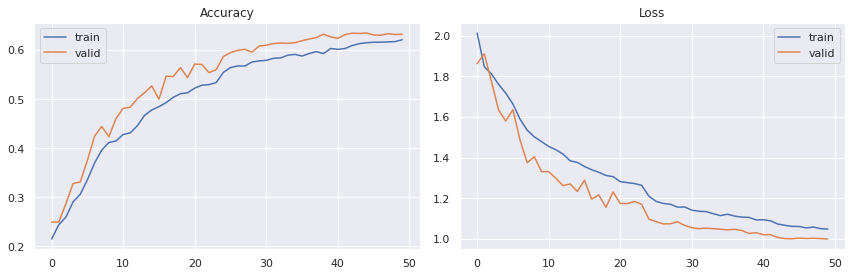

In [0]:
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history_2.epoch, history_2.history['accuracy'], label='train')
sns.lineplot(history_2.epoch, history_2.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history_2.epoch, history_2.history['loss'], label='train')
sns.lineplot(history_2.epoch, history_2.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_cnn2_model.png')
pyplot.show()

In [0]:
test_2 = model_2.evaluate(test_set_x, test_set_y)
print(test_2[0], test_2[1])

113/113 [==============================] - 1s 11ms/step - loss: 0.9790 - accuracy: 0.6386
0.9789547324180603 0.638617992401123


In [0]:
val_2 = model_2.evaluate(val_x, val_y)
print(val_2[0], val_2[1])

113/113 [==============================] - 1s 12ms/step - loss: 1.0000 - accuracy: 0.6344
1.0000218152999878 0.6344385743141174


In [0]:
  model_2.save(os.path.join(mydir, 'model_cnn2.h5')) 

Models View :

In [0]:
!pip install python-pptx

     |████████████████████████████████| 8.9MB 8.7MB/s 
     |████████████████████████████████| 143kB 52.4MB/s 
  Created wheel for python-pptx: filename=python_pptx-0.6.18-cp36-none-any.whl size=275706 sha256=ff5e518ae37891164a7672b85a338ecac40d1f7f299553abfb9b308be8a74f5d
  Stored in directory: /root/.cache/pip/wheels/1f/1f/2c/29acca422b420a0b5210bd2cd7e9669804520d602d2462f20b
Successfully built python-pptx


In [0]:
print("Original Network:")
plot_model(model_orig(), to_file='orig-cnn.png', show_shapes=True, show_layer_names=True)

In [0]:
print("Original Network:")
plot_model(model_orig(), to_file='orig-cnn-simp.png', show_shapes=True, show_layer_names=True)

In [0]:
print("My Custom CNN Network:")
plot_model(model_cnn(), to_file='custom-cnn.png', show_shapes=True, show_layer_names=True)

In [0]:
print(" Resnet Network:")
plot_model(model_resnet(), to_file='resnet-50.png', show_shapes=True, show_layer_names=True)

In [0]:
print("Second Custom CNN Network:")
plot_model(model_cnn2(), to_file='custom-cnn-2.png', show_shapes=True, show_layer_names=True)

In [0]:
model = []
model.append(model_orig())
model.append(model_origsimp())
model.append(model_cnn())
model.append(model_cnn2())
model.append(model_resnet())

102973440/102967424 [==============================] - 1s 0us/step


Train and save models :

Epoch 1/60
225/225 [==============================] - 3s 14ms/step - loss: 1.2225 - accuracy: 0.5414 - val_loss: 1.3222 - val_accuracy: 0.5102
Epoch 2/60
225/225 [==============================] - 3s 14ms/step - loss: 1.2145 - accuracy: 0.5404 - val_loss: 1.3270 - val_accuracy: 0.5040
Epoch 3/60
225/225 [==============================] - 3s 14ms/step - loss: 1.2111 - accuracy: 0.5411 - val_loss: 1.3151 - val_accuracy: 0.5052
Epoch 4/60
225/225 [==============================] - 3s 14ms/step - loss: 1.2089 - accuracy: 0.5429 - val_loss: 1.3075 - val_accuracy: 0.5185
Epoch 5/60
225/225 [==============================] - 3s 14ms/step - loss: 1.2132 - accuracy: 0.5419 - val_loss: 1.3294 - val_accuracy: 0.5007
Epoch 6/60
225/225 [==============================] - 3s 14ms/step - loss: 1.2048 - accuracy: 0.5455 - val_loss: 1.3162 - val_accuracy: 0.5071
Epoch 7/60
225/225 [==============================] - 3s 14ms/step - loss: 1.2074 - accuracy: 0.5450 - val_loss: 1.3093 - val_accuracy: 0.5141

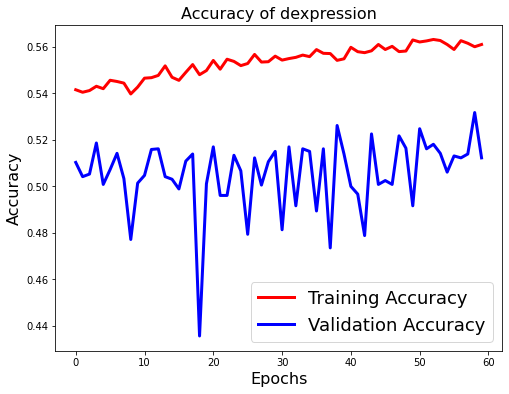

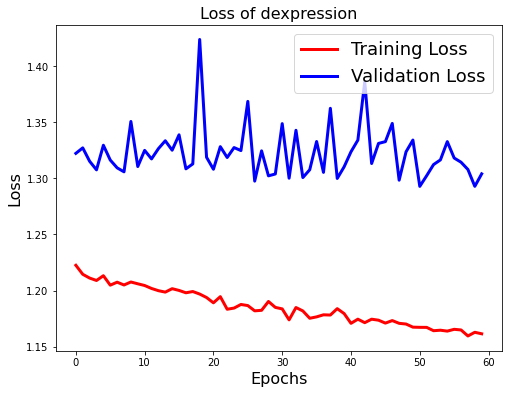

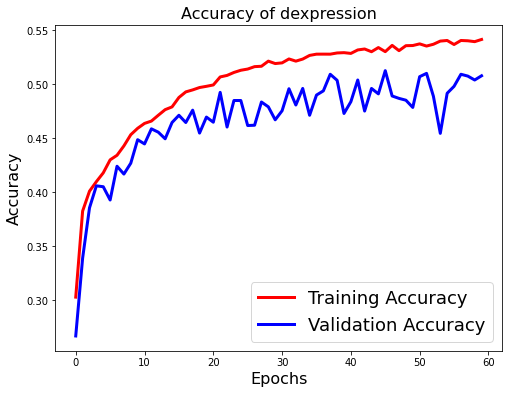

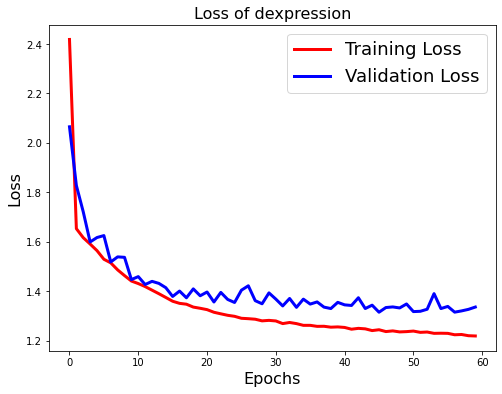

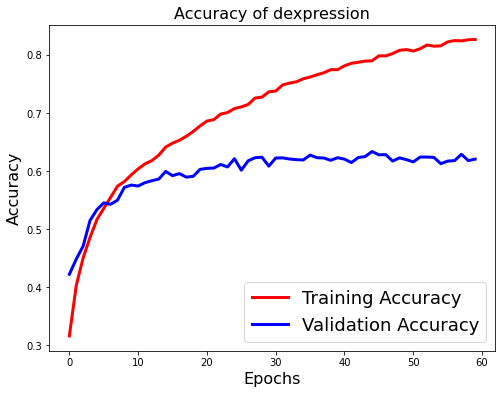

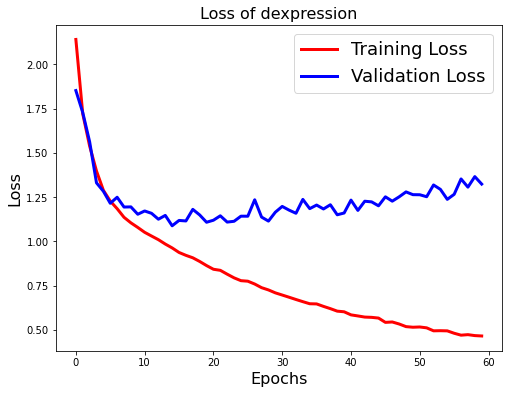

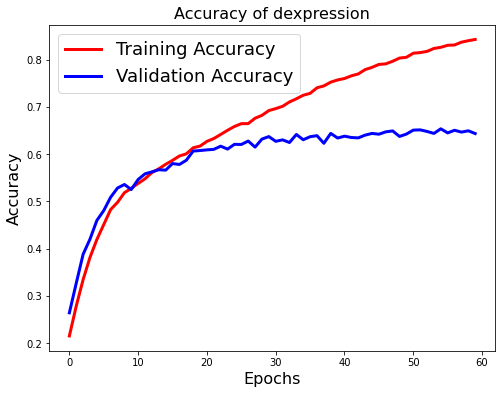

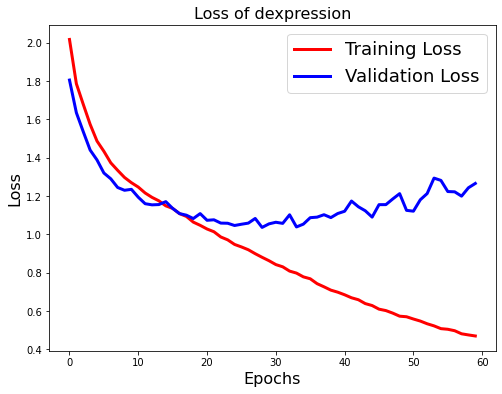

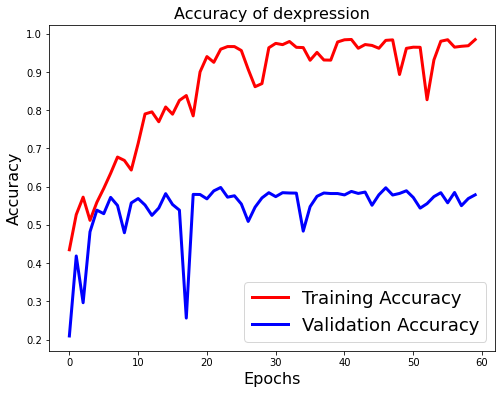

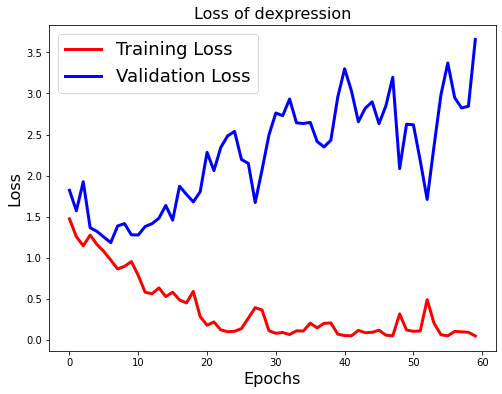

In [0]:
models = []
model_hist = []
num_epoch = 60
batch_size = 128
for i in range(len(model)):
  hist = model[i].fit(train_x,train_y , validation_data = (val_x, val_y), verbose=1, epochs=num_epoch, batch_size=batch_size)
  plot(hist.history['accuracy'], hist.history['val_accuracy'], 'Accuracy')
  plot(hist.history['loss'], hist.history['val_loss'], 'Loss')
  model[i].save(os.path.join(mydir, 'model_{}.h5'.format(i))) 
  models.append(model[i])
  model_hist.append(hist)

Load Saved Models :

In [0]:
models = []
val_acc = []
test_acc = []
for i in range(5):
  model = tf.keras.models.load_model(os.path.join("saved_model/2020-04-24_07-41-16",
                                                  'model_{}.h5'.format(i)))
  models.append(model)
  acc = model.evaluate(val_x,val_y)[1]
  print(acc)

  val_acc.append(acc)
  test_acc.append(model.evaluate(test_set_x, test_set_y)[1])

113/113 [==============================] - 1s 5ms/step - loss: 1.3192 - accuracy: 0.5060
0.5059905052185059
113/113 [==============================] - 0s 4ms/step - loss: 1.3569 - accuracy: 0.4823
0.4823070466518402
113/113 [==============================] - 1s 6ms/step - loss: 1.4636 - accuracy: 0.6280
0.6280301213264465
113/113 [==============================] - 1s 11ms/step - loss: 1.8576 - accuracy: 0.6537
0.6536639928817749
113/113 [==============================] - 2s 21ms/step - loss: 2.9920 - accuracy: 0.5974
0.5973808765411377
113/113 [==============================] - 2s 19ms/step - loss: 2.8613 - accuracy: 0.6049


In [0]:
def ensemble_voting(models, test_set_x):
  labels = []
  for m in models:
      predicts = np.argmax(m.predict(test_set_x), axis=1)
      print(predicts)
      labels.append(predicts)
  # Ensemble with voting
  labels = np.array(labels)
  labels = np.transpose(labels, (1, 0))
  labels = scipy.stats.mode(labels, axis=1)[0]
  labels = np.squeeze(labels)

  return labels

In [0]:
def ensemble_average(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = np.array(yhats)
	print(yhats)
	# sum across ensemble members
	summed = np.sum(yhats, axis=0)
	# argmax across classes
	result = np.argmax(summed, axis=1)
	return result

In [0]:
def ensemble_weighted_average(members, weights, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = np.array(yhats)
	# weighted sum across ensemble members
	summed = np.tensordot(yhats, weights, axes=((0),(0)))
	# argmax across classes
	result = np.argmax(summed, axis=1)
	return result

In [0]:
def ensemble_weighted_average(yhats, weights):
	# make predictions
	yhats = np.array(yhats)
	# weighted sum across ensemble members
	summed = np.tensordot(yhats, weights, axes=((0),(0)))
	# argmax across classes
	result = np.argmax(summed, axis=1)
	return result

In [0]:
yhats = []
yhats.append(model_1.predict([test_set_x, test_x_hog]))
yhats.append(model_2.predict(test_set_x))

In [0]:
weight_test = []
weight_test.append(test_1)
weight_test.append(test_2)

weight_val = []
weight_val.append(val_1)
weight_val.append(val_2)

In [0]:
labels = ensemble_weighted_average(yhats, weight_test)
labels_2 = ensemble_weighted_average(yhats, weight_val)

In [0]:
labels = ensemble_voting(models, test_set_x)

[1 4 6 ... 6 0 4]
[0 4 4 ... 4 0 4]
[2 0 2 ... 6 4 2]
[0 6 2 ... 6 3 2]
[0 3 6 ... 4 3 2]


In [0]:
labels_average = ensemble_average(models, test_set_x)

[[[1.80986062e-01 2.54715234e-01 1.10479772e-01 ... 1.72902584e-01
   7.85761476e-02 1.79165766e-01]
  [1.06634468e-01 2.19109152e-02 1.24950655e-01 ... 3.56309414e-01
   6.95126653e-02 2.03656763e-01]
  [2.04623684e-01 1.02944927e-04 2.09558457e-01 ... 1.70221314e-01
   2.41317060e-02 2.53913790e-01]
  ...
  [6.66413829e-02 4.30373009e-03 3.69193405e-02 ... 1.18974268e-01
   5.92907146e-03 6.62556052e-01]
  [3.06250811e-01 1.78050883e-02 4.37890589e-02 ... 2.61416346e-01
   1.26477890e-02 1.93057358e-01]
  [1.13261625e-01 3.75306122e-02 1.31595805e-01 ... 4.24925506e-01
   2.10742895e-02 2.19766498e-01]]

 [[3.57669592e-01 1.35650337e-01 2.01462507e-01 ... 1.28294989e-01
   4.79120314e-02 1.02169037e-01]
  [1.48931339e-01 1.35800391e-02 2.56032139e-01 ... 3.23524624e-01
   7.38076046e-02 7.98134059e-02]
  [9.17630643e-02 7.35239373e-05 1.74300611e-01 ... 3.32229048e-01
   4.22857814e-02 1.71701491e-01]
  ...
  [5.76994270e-02 6.86312385e-04 9.07691941e-02 ... 4.77658540e-01
   9.78271

In [0]:
labels_w_average = ensemble_weighted_average(models, val_acc, test_set_x)

In [0]:
labels_w_average_test = ensemble_weighted_average(models, test_acc, test_set_x)

In [0]:
rounded_labels=np.argmax(test_set_y, axis=1)

In [0]:
from sklearn.metrics import accuracy_score
test_accuracy_score = accuracy_score(rounded_labels, labels_w_average_test)
print(test_accuracy_score)

0.6740039008080245


In [0]:
from sklearn.metrics import accuracy_score
test_accuracy_score = accuracy_score(rounded_labels, labels_w_average)
print(test_accuracy_score)

0.6740039008080245


In [0]:
from sklearn.metrics import accuracy_score
test_accuracy_score = accuracy_score(rounded_labels, labels_average)
print(test_accuracy_score)

0.6695458344942881


In [0]:
from sklearn.metrics import accuracy_score
test_accuracy_score = accuracy_score(rounded_labels, labels)
print(test_accuracy_score)

0.6469768737809974
